# Graph Theory with SAGE
Welcome everybody here. In this intensive course, we try to show how you can benefit SAGE in your research and study for small graphs. For large graphs, we strongely encourge you to our course "Graph theory with Pytorch". We have tried that our examples are self-explanatory. This course was setup for SageMath 9.1.



In [2]:
# set nicer layout style and define some output routines
import sage.graphs.graph_plot
sage.graphs.graph_plot.DEFAULT_PLOT_OPTIONS["figsize"] = 3 # instead of [4,4]
sage.graphs.graph_plot.DEFAULT_SHOW_OPTIONS["figsize"] = sage.graphs.graph_plot.DEFAULT_PLOT_OPTIONS["figsize"]
#sage.graphs.graph_plot.DEFAULT_PLOT_OPTIONS["vertex_size"] = 50 # instead of 200
#sage.graphs.graph_plot.DEFAULT_PLOT_OPTIONS["vertex_labels"] = False # instead of True
sage.graphs.graph_plot.DEFAULT_PLOT_OPTIONS["vertex_color"] = "white" #instead of salmon

# convert vertex list L of a path or cycle P to the edge list of P (if contained in the graph g)
def my_path_edges(g,L):
    edgeset = [] # on errors like |L|=1 possibly [] is returned
    for i in range(len(L)-1): # as we iterate through all consecutive pairs
        edge = (L[i],L[i+1])
        assert g.has_edge(edge), "g does not contain the edge {!r}".format(edge)
        if len(edge) >= 2:
            edgeset.append(edge) # if edge not empty, append to edgeset
    return edgeset

# convert list L of vertex lists of paths or cycles to the list of their edge lists (if contained in the graph g)
def my_path_edges_list(g,L):
    return [my_path_edges(g,lis) for lis in L]

# convert list L of vertex lists of paths or cycles to the list used for g.show(edge_colors=...)
def my_path_colors(g,L): # rainbow(len(trees))[i] is the ith rainbow color
    return {rainbow(len(L))[i] : my_path_edges_list(g,L)[i] for i in range(len(L))}

## Importing and exporting graphs

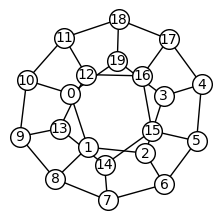

In [3]:
# creating and importing graphs
g = graphs.TutteGraph()
g = digraphs.Complete(5,false)
g = Graph({0:[1,2,3], 4:[0,2], 5:[1,2,3,4]},data_structure="static_sparse",immutable=true) # Sage-Graph with capital G
#g.igraph_graph() # igraph needs to be installed: sage -i python_igraph, which should work in future
g = Graph("ShCHGD@?K?_@?@?C_GGG@??cG?G?GK_?C",data_structure="static_sparse",immutable=true) # graph6-/sparse6-string

g.show()

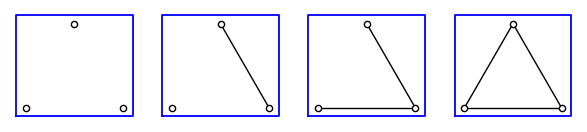

In [4]:
# importing a list of graph6 graphs
glist = graphs_list.from_graph6(["DUW","Dhc","ShCHGD@?K?_@?@?C_GGG@??cG?G?GK_?C"])
with open("in.graph6") as fobj:
    glist = graphs_list.from_whatever(fobj)

graphs_list.show_graphs(glist,vertex_size=20)
# or use show(*glist,vertex_size=20), where the starred expression *... unpacks elements from their list

3


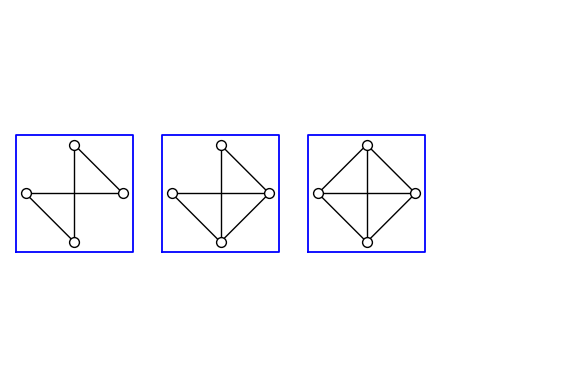

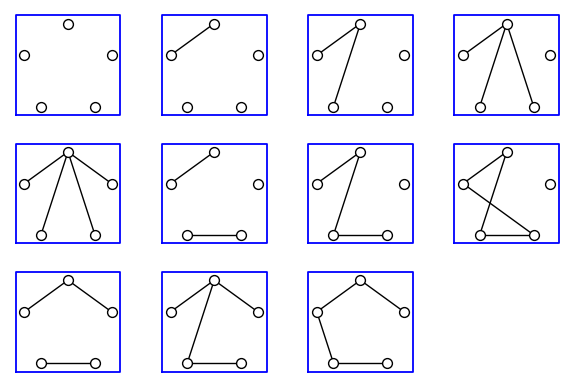

1
1
2
4
11


In [5]:
# generate non-isomorphic graphs
# ... with geng
print(len(list(graphs.nauty_geng("-C 4"))))
graphs_list.show_graphs(graphs.nauty_geng("-C 4"))
#print(len(list(graphs.triangulations(6, only_eulerian=True)))) # plantri has to be installed with: sage -i plantri

# with sage: bipartite graphs with 5 vertices and at most 4 edges
graphs_list.show_graphs((graphs(5, lambda g: g.is_bipartite() and g.size() <= 4)))
for i in range(5):
    print(len(list(graphs(i))))# in future and faster: Graphs(i)

In [57]:
# query fixed graph database on fixed <=7 vertices
Q = GraphQuery(display_cols=['graph6','num_vertices','degree_sequence'],
               num_edges=['<=',6],
               min_degree=2)
print(Q.number_of())
Q.show() # option: with_picture=True could work in future

9
Graph6               Num Vertices         Degree Sequence     
------------------------------------------------------------
Bw                   3                    [2, 2, 2]           
C]                   4                    [2, 2, 2, 2]        
C^                   4                    [2, 2, 3, 3]        
DFw                  5                    [2, 2, 2, 3, 3]     
DK{                  5                    [2, 2, 2, 2, 4]     
DLo                  5                    [2, 2, 2, 2, 2]     
Dbk                  5                    [2, 2, 2, 3, 3]     
EIe_                 6                    [2, 2, 2, 2, 2, 2]  
EJaG                 6                    [2, 2, 2, 2, 2, 2]  


In [60]:
# exporting graphs to strings, files and pictures
g = graphs.DodecahedralGraph()
print(g.graph6_string())
print(g.sparse6_string(),"\n")
print(graphs_list.to_graph6([g,graphs.ErreraGraph()]))
print(g.to_directed().dig6_string()) # for directed graphs only

#g.plot().save("graph.pdf")
#g.plot().save("graph.eps")
#g.plot().save("graph.png")
#g.plot().save("graph.svg")
#g.export_to_file("graph.graphml")
#g.graphviz_to_file_named("graph.dot") # the following doesn't work properly: g.export_to_file("graph.dot")

ShCHGD@?K?_@?@?C_GGG@??cG?G?GK_?C
:S_`abcaDe`Fg_HijhKfLdMkNcOjP_BQ 

ShCHGD@?K?_@?@?C_GGG@??cG?G?GK_?C
PhCGKCa[@pBaBi@t[CEAa_wG

SOA?YA?@Q??I??PO?OI?OHO??IA@@O??IOG@O??IA?@Q?@I?@@O@?I??HOG?I?@@X??G


## Plotting Graphs

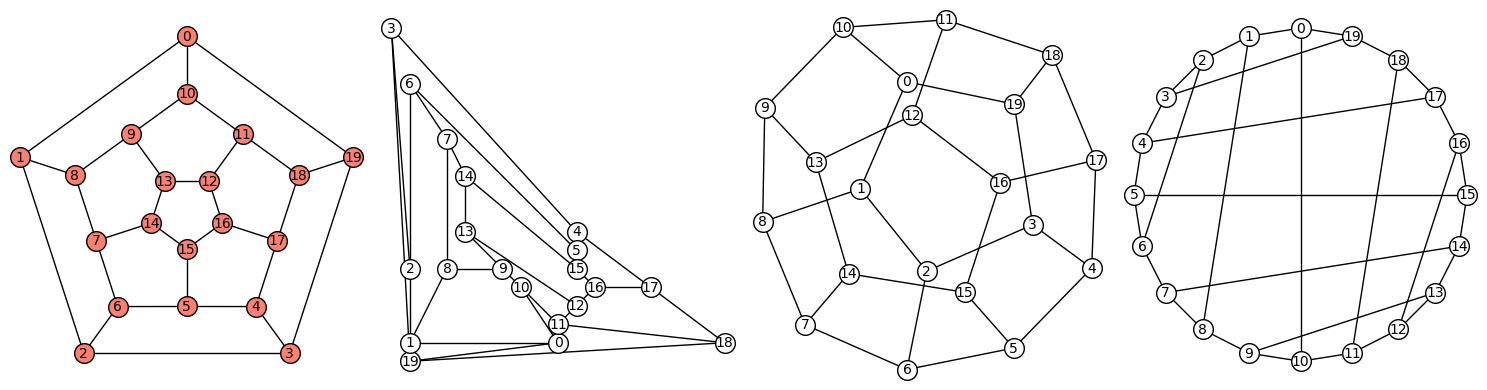

True


In [8]:
# plots available
g = Graph("ShCHGD@?K?_@?@?C_GGG@??cG?G?GK_?C",data_structure="static_sparse",immutable=true)
h = graphs.DodecahedralGraph()

show(graphics_array([
    h.plot(vertex_color="salmon"), # same graph as g but with handmade vertex-positions
    g.plot(layout="planar",save_pos=True),
    g.plot(layout="spring"), # its also possible to start the spring embedder from a given point set computed with g.set_pos(g.layout_circular())
    g.plot(layout="circular"),
    #g.plot(layout="graphviz",prog="dot"), # future, needs graphviz and dot2tex
    #g.plot(layout="graphviz",prog="neato"), #... and more
    #g.plot(layout="tree"), # only for trees
    #g.plot(layout="ranked",heights={i: (i, i+5) for i in range(5)}), # not useful
]),figsize=15)

print(g.is_drawn_free_of_edge_crossings())
#g.show(method="js", vertex_partition=g.coloring()) # great and interactive (but only online)

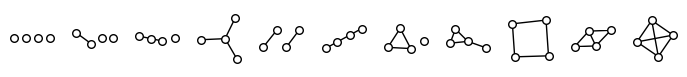

In [9]:
# plot all non-isomorphic graphs on 4 vertices
show(graphics_array([g.plot(vertex_size=30,vertex_labels=False) for g in list(graphs(4))]),figsize=7)

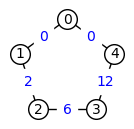

In [10]:
# plot labeled edges
g = graphs.CycleGraph(5)
for edge in g.edges():
    u = edge[0]
    v = edge[1]
    g.set_edge_label(u, v, u*v)

g.show(edge_labels=True,figsize=2)

Graphics3d Object

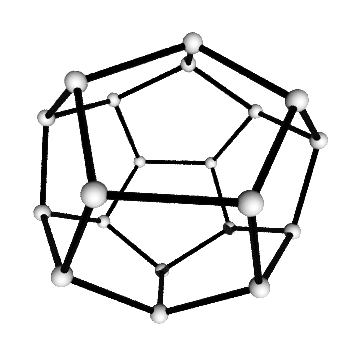

In [11]:
# 3D Plots
g = graphs.DodecahedralGraph()
g.show3d(vertex_colors={(1,1,1): list(g)}) # interactive
g.show3d(engine='tachyon',vertex_colors={(1,1,1): list(g)}) # high quality 3d drawing, but not interactive

In [12]:
# plot polyhedra
dodecahedron(frame=False, opacity=0.8).show()

Graphics3d Object

## Embeddings

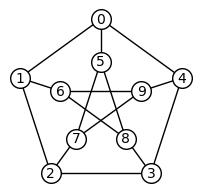

planar = False
apex vertices = []
minimal genus = 1
{0: [1, 4, 5], 1: [0, 2, 6], 2: [1, 3, 7], 3: [2, 4, 8], 4: [0, 3, 9], 5: [0, 7, 8], 6: [1, 9, 8], 7: [2, 5, 9], 8: [3, 6, 5], 9: [4, 6, 7]}
#faces = 5
maximal genus = 3
crossing number = 2
{0: [1, 4, 5], 1: [0, 2, 6], 2: [1, 3, 7], 3: [2, 4, 8], 4: [0, 3, 9], 5: [0, 7, 8], 6: [1, 8, 9], 7: [2, 5, 9], 8: [3, 5, 6], 9: [4, 7, 6]}


In [13]:
# planarity test, minimal and maximal genus, combinatorial faces and crossing number
g = graphs.PetersenGraph()
g.show()

print("planar =",g.is_planar())
print("apex vertices =",g.apex_vertices()) # decision version: g.is_apex()
print("minimal genus =",g.genus()) # compute minimal genus, this stores embedding of minimal genus
print(g.get_embedding())
print("#faces =",g.num_faces()) # without setting the embedding in advance, the combinatorial faces are not defined
print("maximal genus =",g.genus(minimal=False)) # compute maximal genus
# prepend %time for measuring time and %prun for profiling to any single command
print("crossing number =",g.crossing_number()) # compute crossing number, seems to store embedding of solution
print(g.get_embedding()) # but so far the stored combinatorial non-planar crossing-minimal embedding cannot be plotted

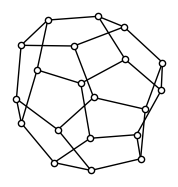

In [14]:
# planar duals
g = graphs.IcosahedralGraph()
g.planar_dual().show(vertex_labels=False,vertex_size=20)

[(2, 1, 'blue'), (2, 8, 'red'), (2, 9, 'green'), (3, 2, 'red'), (3, 9, 'green'), (3, 10, 'blue'), (4, 3, 'green'), (4, 5, 'blue'), (4, 6, 'red'), (5, 0, 'green'), (5, 1, 'blue'), (5, 6, 'red'), (6, 1, 'blue'), (6, 2, 'red'), (6, 3, 'green'), (7, 0, 'green'), (7, 8, 'red'), (7, 11, 'blue'), (9, 7, 'green'), (9, 8, 'red'), (9, 10, 'blue'), (10, 4, 'red'), (10, 7, 'green'), (10, 11, 'blue'), (11, 0, 'green'), (11, 4, 'red'), (11, 5, 'blue')]


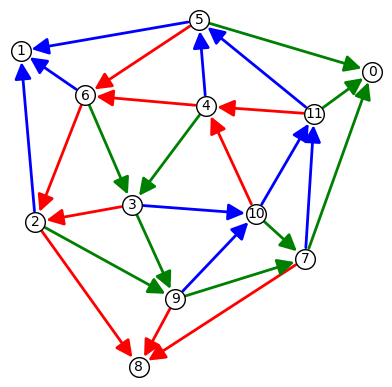

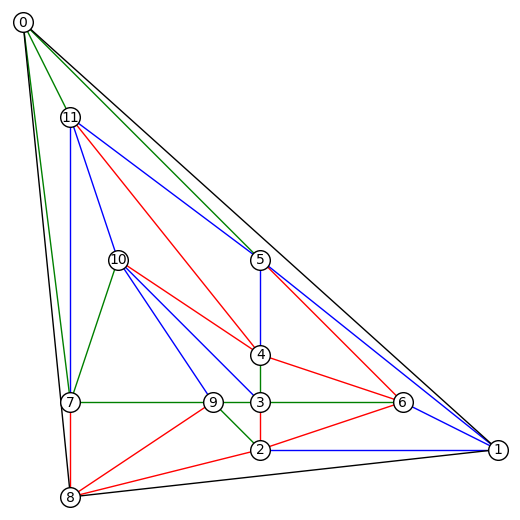

In [15]:
# Schnyder Wood on a maximal plane graph, wait for generic general examples
from sage.graphs.schnyder import minimal_schnyder_wood
g = graphs.IcosahedralGraph()
# planar embedding must be set, choose external face with edge (0,1)
g.layout(layout="planar",external_face=(0,1),set_embedding=True,save_pos=True)
wood = minimal_schnyder_wood(g,{0,1}) # v_r=0,v_g=1,v_b is then picked; minimal=False gives a maximal schnyder wood

wood.relabel({-3:8}) # relabel back the third vertex v_b=-3 (here v_b was 8) in the wood
print(wood.edges())
wood.show(color_by_label={'red':'red','blue':'blue','green':'green',None:'black'},figsize=6)
g.show(edge_colors={'red':[(u,v) for u,v in wood.edges(labels=False) if wood.edge_label(u,v)=="red"],
                    'blue':[(u,v) for u,v in wood.edges(labels=False) if wood.edge_label(u,v)=="blue"],
                    'green':[(u,v) for u,v in wood.edges(labels=False) if wood.edge_label(u,v)=="green"]
                   },figsize=8)

## Isomorphisms

In [16]:
# automorphism group, vertex-transitivity
g = graphs.CubeGraph(3)
print("vertex-transitive =",g.is_vertex_transitive())
print("edge-transitive =",g.is_edge_transitive())
print("arc-transitive =",g.is_arc_transitive())

Aut = g.automorphism_group()
print("Order of automorphism group: {}".format(Aut.order()))
print("{}".format(Aut)) # random
g.show3d(vertex_colors={(1,1,1): list(g)})

vertex-transitive = True
edge-transitive = True
arc-transitive = True
Order of automorphism group: 48
Permutation Group with generators [('010','100')('011','101'), ('001','010')('101','110'), ('000','001')('010','011')('100','101')('110','111')]


Graphics3d Object

False
True


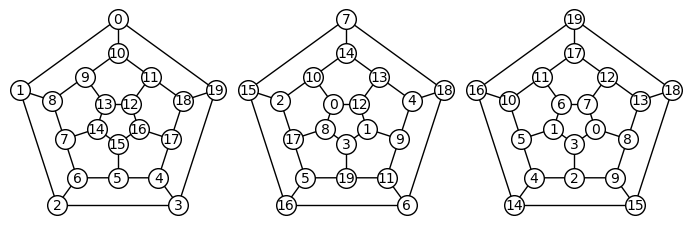

In [17]:
# isomorphisms and canonical graph (latter uses canonization function from bliss)
g = graphs.DodecahedralGraph()
print(g.is_isomorphic(graphs.IcosahedralGraph()))

h = copy(g) # must be copied for permutation to take effect
perm = SymmetricGroup(g.num_verts()).random_element()
h.relabel(perm)

print(g.is_isomorphic(h))
show(graphics_array([
    g.plot(),
    h.plot(),
    g.canonical_label().plot()
]),figsize=7)

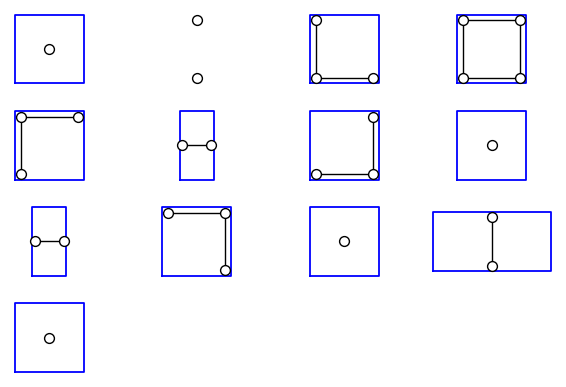

In [18]:
# induced subgraphs (unfortunately including isomorphic ones)
g = graphs.CubeGraph(2)
#graphics_array(list(g.connected_subgraph_iterator()))
subgraphs = list(g.connected_subgraph_iterator())
graphs_list.show_graphs(subgraphs)

## Minors and width-parameters

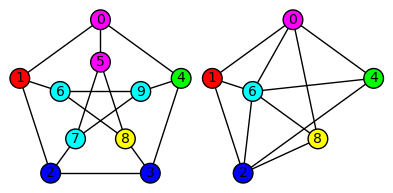

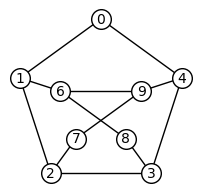

In [19]:
# h-minor and h-subdivision of g
g = graphs.PetersenGraph()
h = graphs.CompleteBipartiteGraph(3,3)
model = g.minor(h) # outputs a model of h in g

# h-minor
# now transform model to the minor h
subgraph = g.subgraph(flatten(model.values(), max_level = 1)) # take the induced subgraph of all model vertices
[subgraph.merge_vertices(c) for c in model.values() if len(c)>1] # contract every model vertex set to get minor
show(graphics_array([
    g.plot(partition=model),
    subgraph.plot(vertex_colors={rainbow(len(model))[i] :[model[i][0]] for i in range(len(model))})
]),figsize=4)

# h-subdivision
subdivision = g.topological_minor(h) # CPLex much more efficient
if subdivision: subdivision.show(figsize=3)
else: print("no h-minor in g")

minimal image-size of an homomorphism is 3 vertices
{0: 2, 1: 1, 2: 0, 3: 2, 4: 1, 5: 0, 6: 2, 7: 1, 8: 1, 9: 0}


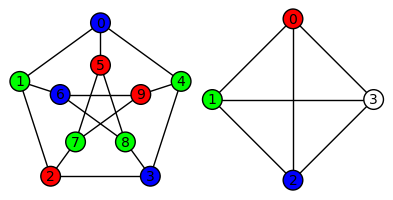

In [20]:
# homomorphism of g to h
g = graphs.PetersenGraph()
h = graphs.CompleteGraph(4)
hom = g.has_homomorphism_to(h,core=True) # core=True forces a minimal number of vertices in the image

assert hom,"no homomorphism from {} to {}".format(g,h) # print error if no homomorphism
values = sorted(set(hom.values())) # set kills double occurences
print("minimal image-size of an homomorphism is {} vertices".format(len(values)))
print(hom)

hcolors = rainbow(len(values))
show(graphics_array([
    g.plot(vertex_colors={hcolors[i] : [v for v,c in hom.items() if c==i] for i in range(len(values))}),
    h.plot(vertex_colors={hcolors[i] : [values[i]] for i in range(len(values))})
]),figsize=4)

path-width = 5
tree-width = 4


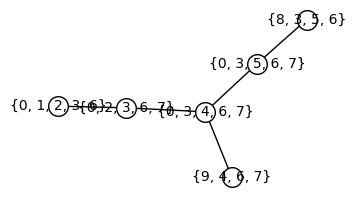

In [21]:
# treewidth and pathwidth
g = graphs.PetersenGraph()
print("path-width =",g.pathwidth())
print("tree-width =",g.treewidth())
g.treewidth(certificate=True).show()

rank-width = 3


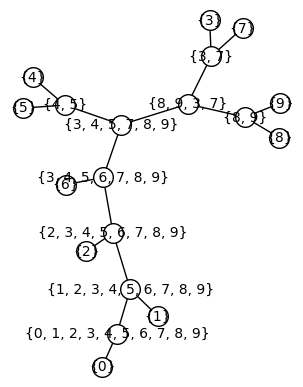

In [22]:
# rankwidth
g = graphs.PetersenGraph()
rw, tree = g.rank_decomposition()
print("rank-width =",rw)
tree.show(figsize=6)

In [23]:
# cutwidth
from sage.graphs.graph_decompositions.cutwidth import cutwidth
g = graphs.PetersenGraph()
cw,L = cutwidth(g)
print("cut-width =",cw)
print("cut-ordering =",L)

cut-width = 6
cut-ordering = [0, 1, 2, 3, 4, 5, 7, 6, 8, 9]


In [24]:
# minimal clique separator decomposition -> future
g = graphs.PathGraph(5)
#ascii_art(g.atoms_and_clique_separators(rooted_tree=True))

## Flows

3


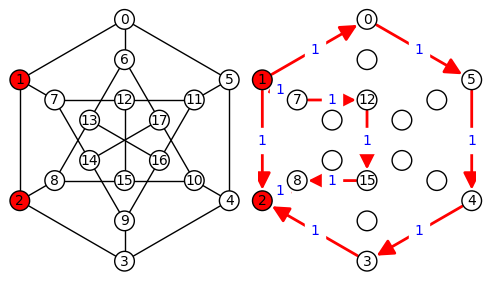

In [25]:
# maximum st-flow
g = graphs.PappusGraph()
s=1; t=2;
cardinal,flow_graph = g.flow(s,t,integer=True,value_only=False) # integer=true, as here the graph is unweighted
print(cardinal)
show(graphics_array([
    g.plot(vertex_colors={"red":[s,t]}),
    flow_graph.plot(edge_labels=True,edge_color="red",vertex_colors={"red":[s,t]})
]),figsize=5)

k = 5


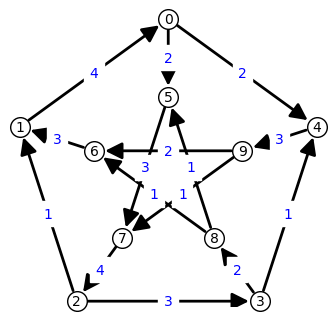

In [26]:
# nowhere-zero k-flows (orients to positive flow values 1,...,k-1)
g = graphs.PetersenGraph()
k = 5

h = g.nowhere_zero_flow(k) # k must be given, k=4 has no solution on the Petersen graph
pos = g.get_pos() # the handmade positions of the vertices (otherwise the solution is layouted differently as g)
h.set_pos(pos) # layout h like g

print("k =",k)
h.show(edge_labels=True,figsize=5)

3 paths


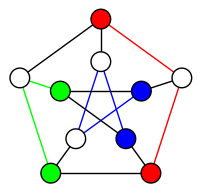

In [27]:
# multicommodity flow (disjoint paths between vertex pairs)
g = graphs.PetersenGraph()
pairs = [(0,3),(2,6),(8,9)] # unit-weight 1 (otherwise add a third component weight)
sol = g.multicommodity_flow(pairs,vertex_bound=True) # vertex_bound=true forces internally vertex-disjointness of paths

print(len(sol),"paths")
g.show(partition=pairs,
       edge_colors={rainbow(len(sol))[i] : sol[i].edges(labels=False) for i in range(len(sol))}
       ,vertex_labels=False,figsize=3)

## Connectivity

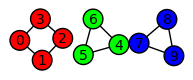

In [28]:
# connected components
g = graphs.CycleGraph(4)+2*graphs.CycleGraph(3) # disjoint graph union
g.show(partition=g.connected_components(),figsize=2)

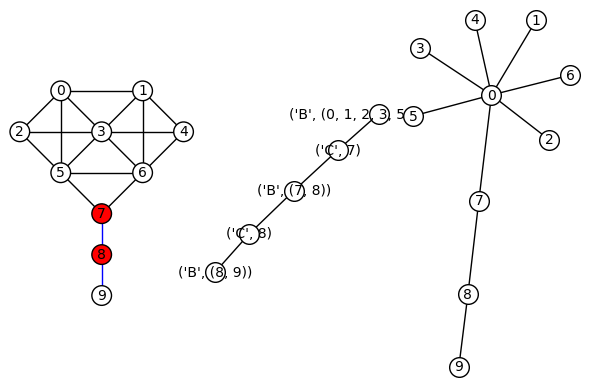

cut-vertices: [8, 7]
bridges: [(8, 9), (7, 8)]


In [29]:
# block-cut tree, bridges and dominator tree
from sage.graphs.connectivity import blocks_and_cuts_tree
g = graphs.KrackhardtKiteGraph()
show(graphics_array([
    g.plot(vertex_colors={"red":g.blocks_and_cut_vertices()[1]},edge_colors={"blue":g.bridges(labels=False)}),
    g.blocks_and_cuts_tree().plot(),
    g.dominator_tree(0).plot()
]),figsize=6) # vertex 0 is root
print("cut-vertices:",g.blocks_and_cut_vertices()[1])
print("bridges:",g.bridges(labels=False))

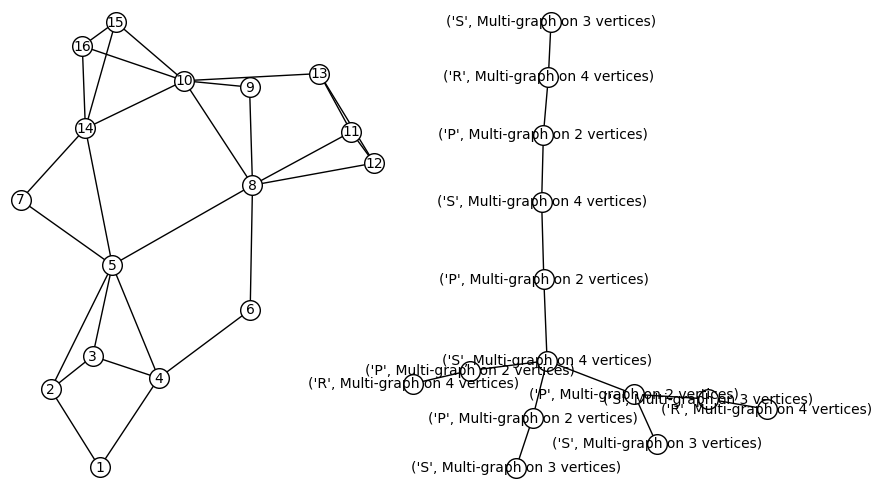

In [30]:
# SPQR-tree
g = Graph([(1, 2), (1, 4), (2, 3), (2, 5), (3, 4), (3, 5), (4, 5),(4, 6), (5, 7), (5, 8), (5, 14), (6, 8), (7, 14),
           (8, 9), (8, 10), (8, 11), (8, 12), (9, 10), (10, 13), (10, 14), (10, 15), (10, 16),(11, 12), (11, 13),
           (12, 13), (14, 15), (14, 16), (15, 16)])
show(graphics_array([
    g.plot(), # Gutwenger's example graph
    g.spqr_tree().plot()
]),figsize=8)

In [31]:
# edge- and vertex-connectivity
g = graphs.TutteGraph()
print("delta =",min(g.degree()))
print("lambda =",g.edge_connectivity())
print("kappa =",g.vertex_connectivity())
print(g.vertex_connectivity(k=3))

delta = 3
lambda = 3
kappa = 3
True


[[0, 19, 3], [0, 1, 2, 3], [0, 10, 11, 18, 17, 4, 3]]
[[0, 19, 3], [0, 1, 2, 3], [0, 10, 11, 18, 17, 4, 3]]
min s-t-cut = 3
min s-t-separator = 3


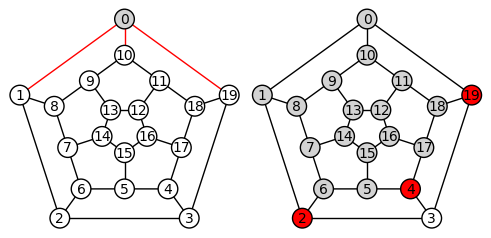

In [32]:
# edge- and vertex-disjoint paths, minimum edge-cut and separator between s and t
s=0; t=3;
g = graphs.DodecahedralGraph()
print(g.edge_disjoint_paths(s,t))
print(g.vertex_disjoint_paths(s,t))

value,edgecut,[A,B] = g.edge_cut(s, t, value_only=False,vertices=True)
print("min s-t-cut =",value)
value,separator,[C,D] = g.vertex_cut(s, t, value_only=False,vertices=True)
print("min s-t-separator =",value)
show(graphics_array([
    g.plot(vertex_colors={"lightgray":A},edge_colors={"red":edgecut}),
    g.plot(vertex_colors={"lightgray":C,"red":separator})
]),figsize=5)
# for a separator S, cleave(g,S) computes the non-trivial S-bridges of the graph, optionally with adding a clique at S

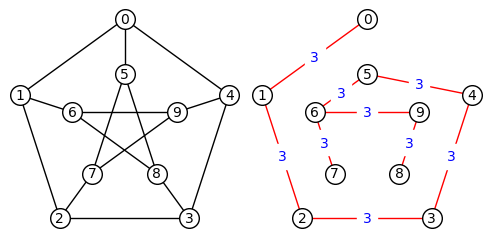

In [33]:
# Gomory-Hu tree
g = graphs.PetersenGraph()
t = g.gomory_hu_tree()

show(graphics_array([g.plot(),
               t.plot(edge_labels=True,edge_color="red")]),figsize=5)
assert(all(t.flow(u,v)==g.flow(u,v) for u,v in Subsets(g.vertices(),2))) # check that all local edge-connectivities are same
assert(g.edge_connectivity() == min(t.edge_labels()))

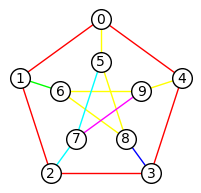

In [34]:
# ear-decomposition ala Schmidt :)
g = graphs.PetersenGraph()
ears = g.ear_decomposition()

g.show(edge_colors=my_path_colors(g,ears))

5 edges


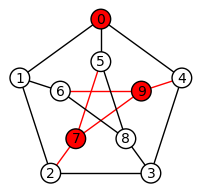

In [35]:
# multi-way cut
g = graphs.PetersenGraph()
S = [0,7,9] # the vertices that have to be separated from each other
edges = g.multiway_cut(S)

print(len(edges),"edges")
g.show(vertex_colors={"red":S},edge_colors={"red":edges})

max cut = 12


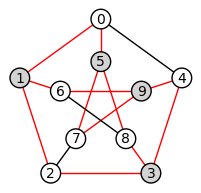

In [36]:
# max cut
g = graphs.petersen_family()[0]
[value,edges,[A,B]] = g.max_cut(vertices=True)

print("max cut =",Integer(value))
g.show(vertex_colors={"lightgray":A},edge_colors={"red":edges},figsize=3)

edge-connectivity = 5 so there are at least 2 edge-disjoint spanning trees


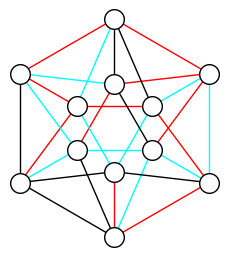

In [37]:
# edge-disjoint spanning trees
g = graphs.IcosahedralGraph()
k = Integer(g.edge_connectivity())
print("edge-connectivity =",k, "so there are at least",floor(k/2),"edge-disjoint spanning trees")
trees = g.edge_disjoint_spanning_trees(floor(k/2)) # we can always expect >= floor(k/2) such trees

g.show(edge_colors={rainbow(len(trees))[i] : trees[i].edges(labels=False) for i in range(len(trees))},
       vertex_labels=False,figsize=4)

linear arboricity = 3


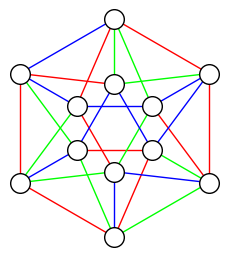

In [38]:
# arboricity and linear arboricity (former -> future)
from sage.graphs.graph_coloring import linear_arboricity
g = graphs.IcosahedralGraph()
#arb = g.arboricity() # -> future
lia = linear_arboricity(g)

print("linear arboricity =",len(lia))
g.show(edge_colors={rainbow(len(lia))[i] : lia[i].edges(labels=False) for i in range(len(lia))},
       vertex_labels=False,figsize=4)

In [39]:
# maximal adjacency orderings -> future
g = graphs.CycleGraph(4) * 2
#g.maximum_cardinality_search()[0]
#g.maximum_cardinality_search_M(initial_vertex=7)[0]

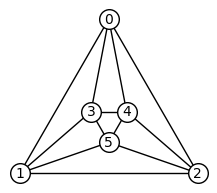

SERIES
 PARALLEL
  2
  3
 PARALLEL
  1
  4
 PARALLEL
  0
  5


In [40]:
# modular decomposition
from sage.graphs.graph_decompositions.modular_decomposition import *
g = graphs.OctahedralGraph()
g.show()

decomp = modular_decomposition(g) # use (algorithm='tedder') for faster linear-time but unsafe algorithm
print_md_tree(decomp)

## Paths and Cycles

n = 12
smallest cycle length = 3
smallest odd cycle length = 3
Hamiltonian = True


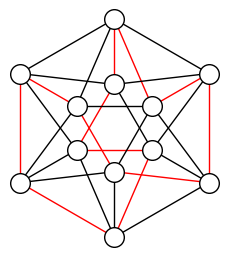

In [41]:
# girth, odd girth and hamiltonian cycle
g = graphs.IcosahedralGraph()
h = g.hamiltonian_cycle()
print("n =",g.num_verts())
print("smallest cycle length =",g.girth())
print("smallest odd cycle length =",g.odd_girth())
print("Hamiltonian =",len(h)==g.num_verts())

g.show(edge_colors={"red" : [e for e in h.edges()]}
       ,vertex_labels=False,figsize=4)

n = 10
longest path length = 10


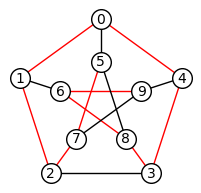

In [42]:
# longest path (for longest cycles see TSP)
g = graphs.PetersenGraph()
longest = g.longest_path() # may also specify start- and endvertex
print("n =",g.num_verts())
print("longest path length =",len(longest))

g.show(edge_colors={"red": longest.edges(labels=False)})

In [43]:
# number of subgraphs (here cycles of a given length) in (exhaustive search)
from sage.graphs.generic_graph_pyx import SubgraphSearch
g = graphs.IcosahedralGraph()
h = graphs.CycleGraph(10)
S = SubgraphSearch(g, h)

print(S.cardinality(),"subgraphs")

66720 subgraphs


[[0, 1, 2], [0, 1, 3], [0, 2, 3]]


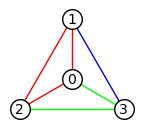

In [44]:
# minimum cycle basis
g = graphs.TetrahedralGraph()
basis = g.minimum_cycle_basis(by_weight=False)

print(sorted(basis))
extend = [l.append(l[0]) for l in basis] # append first vertex for output purposes
g.show(edge_colors=my_path_colors(g,basis),figsize=2)

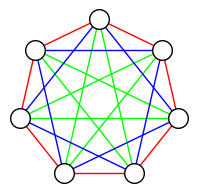

In [45]:
# 2-factor, outputs garbage when the graph has no 2-factor
g = graphs.CompleteGraph(7)
factor = g.two_factor_petersen()

g.show(edge_colors={rainbow(len(factor))[i] : factor[i] for i in range(len(factor))},vertex_labels=False)

## Colorings

chromatic index = 3
chromatic number = 3


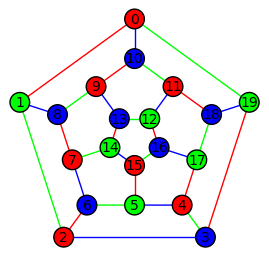

In [46]:
# chromatic number and index
g = graphs.DodecahedralGraph()
print("chromatic index =",g.chromatic_index())
print("chromatic number =",g.chromatic_number())
from sage.graphs.graph_coloring import vertex_coloring,edge_coloring
g.show(partition=vertex_coloring(g,value_only=False),
       edge_colors=edge_coloring(g,hex_colors=True,value_only=False),
       figsize=4)

greedy coloring = 4
chromatic number = 3


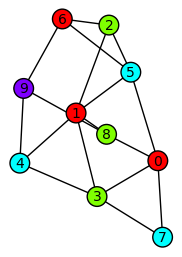

In [47]:
# greedy coloring
g = graphs.RandomGNP(10,0.35)
avail_colors = Set(range(g.order()))
color = {}
for u in g:
    forbidden = Set([color[v] for v in g.neighbors(u) if v in color])
    color[u] = min(avail_colors-forbidden)

maximum = max(color.values())+1
print("greedy coloring =",maximum)
print("chromatic number =",g.chromatic_number())
g.show(vertex_colors={rainbow(maximum)[i] : [v for v,c in color.items() if c==i] for i in range(maximum)},figsize=4)

In [48]:
# easy interactive visualization with js (but still needs online access)
g = graphs.PetersenGraph()
#g.show(method="js", vertex_partition=g.coloring())

## Matchings

size = 5
perfect matching = True


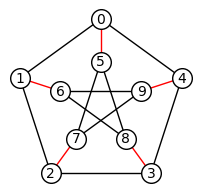

In [49]:
# maximum (weighted) matching
g = graphs.PetersenGraph()
matching = [(u,v) for u,v,w in g.matching()]
print("size =",len(matching))
print("perfect matching =",g.has_perfect_matching()) # perfect matchings are also iterable

g.show(edge_colors={"red": matching})

## Metrics

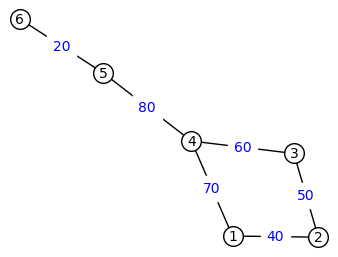

{1: 0.16459613361799802, 2: 0.13977926864974766, 3: 0.1653988472578895, 4: 0.30631987809915334, 5: 0.17000501912411228, 6: 0.05390085325109914}


In [50]:
# pagerank
g = Graph([(1, 2, 40), (2, 3, 50), (3, 4, 60), (1, 4, 70), (4, 5, 80), (5, 6, 20)])
g.show(edge_labels=True,figsize=4)
print(g.pagerank(by_weight=True)) # abs tol 1e-9

## Combinatorial Optimiziation

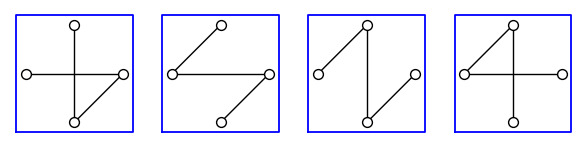

In [51]:
# all spanning trees
g = graphs.CubeGraph(2)
graphs_list.show_graphs(g.spanning_trees())

vertex cover = 6
[0, 1, 3, 7, 8, 9]


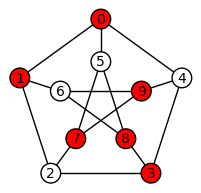

In [52]:
# solve vertex cover with mixed integer linear programming (minimization problem)
g = graphs.PetersenGraph()
ILP = MixedIntegerLinearProgram(maximization=False) # for other ILP-Solvers like Gurobi,CPlex,Coin, use: solver="Coin"
b = ILP.new_variable()
ILP.set_binary(b) # b must be binary (and will be a variable on vertices)
ILP.set_objective(sum([b[v] for v in g])) # objective is to minimize the sum of all b_v (number of vertices in the set)
for (u,v) in g.edges(labels=None): # every edge must have at least one endvertex in the vertex-cover
    ILP.add_constraint(b[u]+b[v],min=1) # inequality: b_u + b_v >= 1 for all edges uv
ILP.solve()
#ILP.polyhedron() # 10-dimensional here, not easily plottable

sol = ILP.get_values(b) # get variable solution values
d = [v for v in sol if sol[v] == 1] # filter variables set to 1.0 and convert these to a list of integers
print("vertex cover =",Integer(ILP.get_objective_value())) # print solution value
print(d)
g.show(vertex_colors={"red":d})

min TSP = 29


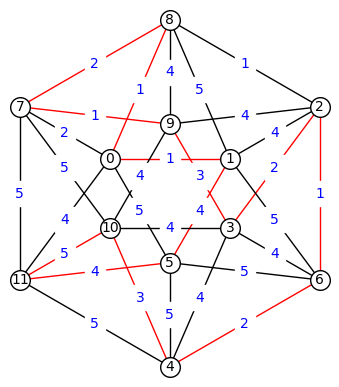

longest unweighted cycle = 12 ; n= 12


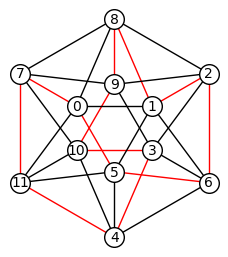

In [53]:
# TSP (gives also longest cycles) -> does not work for non-Hamiltonian graphs -> future
g = graphs.IcosahedralGraph()
for u,v in g.edges(labels=False):
    g.set_edge_label(u,v,randint(1,5)) # assign random weights to edges

tsp = g.traveling_salesman_problem(use_edge_labels=True)
print("min TSP =",sum(tsp.edge_labels()))
g.show(edge_labels=True,edge_colors={"red": tsp.edges(labels=False)},figsize=6)

# compute longest cycle by ignoring the weights and maximizing
longest = g.traveling_salesman_problem(use_edge_labels=False,maximize=True)
print("longest unweighted cycle =",len(longest.edge_labels()),"; n=",g.num_verts())
g.show(edge_labels=False,edge_colors={"red": longest.edges(labels=False)},figsize=4)

In [54]:
# SAT-solver
solver = SAT()
solver.add_clause( ( 1,  2,  3) )
solver.add_clause( ( 1,  2, -3) )
solver.add_clause( ( -1, -2) )
solver.add_clause( ( 1,  2) )
solver.add_clause( ( 1, -2) )
#solver.add_clause( ( -1, 2) )
print("satisfying assignment:",[Integer(b) for b in solver()]) # random

satisfying assignment: [0, 1, 0, 0]


## Interaction

In [55]:
# easy interactive visualization with js (but still needs online access)
g = graphs.DodecahedralGraph()
#g.show(method="js", vertex_partition=g.coloring())
#graph_editor(g) # possibly deprecated